In [1]:
import os

# Define o caminho base onde as trajetórias estão localizadas
base_path = "/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov"

# Nome do arquivo .prmtop (assumindo que é o mesmo para todas as trajetórias)
prmtop_file = os.path.join(base_path, "/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.prmtop")

# Inicializa o script cpptraj com a topologia
cpptraj_script = f"parm {prmtop_file}\n"

# Verifica e processa cada arquivo .dcd esperado
for i in range(1, 11):
    dcd_path = os.path.join(base_path, f"/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/{i}/5cc8_wr_{i}.dcd")
    if os.path.isfile(dcd_path):  # Usa isfile para garantir que é um arquivo
        print(f"Adding {dcd_path} to cpptraj script.")
        cpptraj_script += f"trajin {dcd_path}\n"
    else:
        print(f"File {dcd_path} not found.")

# Finaliza o script cpptraj
cpptraj_script += "run\n"

# Debug: Imprime o script cpptraj para verificar
print("CPPTRAJ Script:")
print(cpptraj_script)

# Aqui você adicionaria o código para escrever este script em um arquivo e executá-lo com subprocess, como antes


Adding /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.dcd to cpptraj script.
Adding /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/2/5cc8_wr_2.dcd to cpptraj script.
Adding /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/3/5cc8_wr_3.dcd to cpptraj script.
Adding /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/4/5cc8_wr_4.dcd to cpptraj script.
Adding /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/5/5cc8_wr_5.dcd to cpptraj script.
Adding /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/6/5cc8_wr_6.dcd to cpptraj script.
Adding /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/7/5cc8_wr_7.dcd to cpptraj script.
Adding /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/8/5cc8_wr_8.dcd to cpptraj script.
Adding /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/9/5cc8_wr_9.dcd to

In [2]:
import os
import subprocess

# Define o caminho base onde as trajetórias estão localizadas
base_path = "/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov"

# Nome do arquivo .prmtop (assumindo que é o mesmo para todas as trajetórias)
prmtop_file = os.path.join(base_path, "/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.prmtop")

# Gera a lista de caminhos dos arquivos .dcd
dcd_files = [os.path.join(base_path, f"{i}/5cc8_wr_{i}.dcd") for i in range(1, 11)]

# Verifica a existência dos arquivos .dcd e os adiciona ao script cpptraj
cpptraj_script = f"parm {prmtop_file}\n"
for dcd_file in dcd_files:
    if os.path.exists(dcd_file):
        replicate_number = dcd_file.split('/')[-2]  # Assume-se que o número da réplica é o nome do diretório
        cpptraj_script += f"""
trajin {dcd_file}
reference {dcd_file} 1
rms reference out rmsd_replicate_{replicate_number}.dat "@C, @N, @O" mass
"""
cpptraj_script += "run\n"

# Salva o script cpptraj em um arquivo
with open("cpptraj_input.in", "w") as file:
    file.write(cpptraj_script)

In [3]:
# Executa o script cpptraj
subprocess.run(["cpptraj", "-i", "cpptraj_input.in"])


CPPTRAJ: Trajectory Analysis. V6.4.4 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 02/07/24 12:32:14
| Available memory: 2.358 GB

INPUT: Reading input from 'cpptraj_input.in'
  [parm /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.prmtop]
	Reading '/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.dcd]
	Reading '/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.dcd' as Charmm DCD
	Version < 22; assuming X-aligned cell.
  [reference /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.dcd 1]
	Reading '/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.dcd' as Charmm DCD
	Version < 22; assuming X-aligned cell.
	Settin

CompletedProcess(args=['cpptraj', '-i', 'cpptraj_input.in'], returncode=0)

In [12]:
import subprocess

# Define o caminho base onde as trajetórias estão localizadas
base_path = "/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov"

# Nome do arquivo .prmtop (assumindo que é o mesmo para todas as trajetórias)
prmtop_file = os.path.join(base_path, "1/5cc8_wr_1.prmtop")

# Executa o cpptraj para cada réplica individualmente
for i in range(1, 11):
    dcd_path = os.path.join(base_path, f"{i}/5cc8_wr_{i}.dcd")
    output_file = "./rmsd_replicate_{i}.dat"
    cpptraj_script_content = f"""
    parm {prmtop_file}
    trajin {dcd_path}
    reference {dcd_path} 1
    rms reference out {output_file} "@C, @N, @O" mass
    run
    quit
    """

    # Escreve o script cpptraj para um arquivo temporário
    script_file_path = f"cpptraj_replicate_{i}.in"
    with open(script_file_path, 'w') as script_file:
        script_file.write(cpptraj_script_content)
    
    # Executa o cpptraj com o script gerado
    subprocess.run(["cpptraj", "-i", script_file_path])

    # Opcional: Remover o arquivo de script após a execução, se desejado
    # os.remove(script_file_path)



CPPTRAJ: Trajectory Analysis. V6.4.4 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 02/07/24 13:13:50
| Available memory: 388.248 MB

INPUT: Reading input from 'cpptraj_replicate_1.in'
  [parm /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.prmtop]
	Reading '/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [trajin /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.dcd]
	Reading '/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.dcd' as Charmm DCD
	Version < 22; assuming X-aligned cell.
  [reference /media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.dcd 1]
	Reading '/media/leon/FEDF-FDB3/md_thil_10replicates_100ns/1_replica/water_remov/1/5cc8_wr_1.dcd' as Charmm DCD
	Version < 22; assuming X-aligned cell.

/home/leon/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


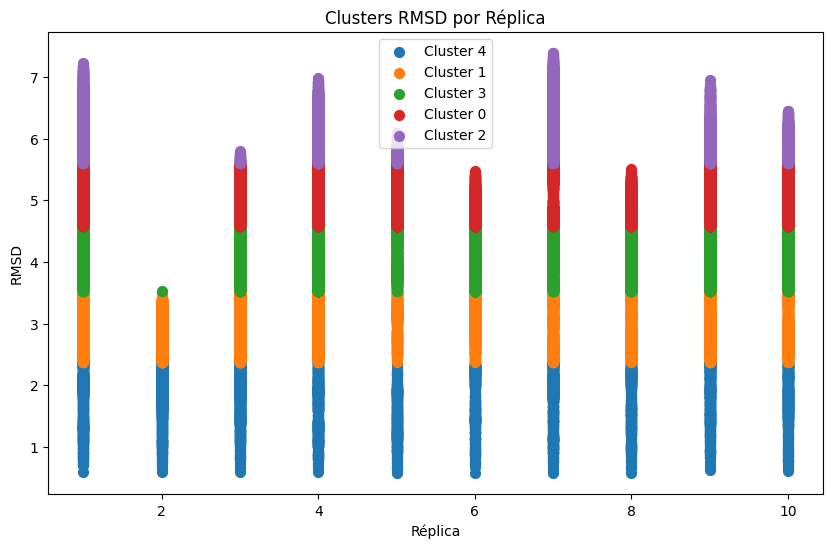

In [13]:
import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Caminho base onde os arquivos .dat estão localizados
base_path = "./"

# Lista para armazenar os dados de todos os arquivos
all_data = []

# Ler cada arquivo .dat e adicionar a coluna da réplica
for i in range(1, 11):
    file_path = f"{base_path}/rmsd_replicate_{i}.dat"
    # Certifique-se que o separador de colunas no seu arquivo .dat é corretamente identificado (e.g., espaço, vírgula)
    data = pd.read_csv(file_path, sep="\s+", comment='#', header=0, names=["Frame", "RMSD"])
    data["Replicate"] = i  # Adiciona a coluna da réplica
    all_data.append(data)

# Combina todos os dados em um único DataFrame
combined_data = pd.concat(all_data)

# Preparar os dados para clusterização (usaremos apenas a coluna RMSD aqui)
X = combined_data[["RMSD"]].values

# Clusterização com K-means
kmeans = KMeans(n_clusters=5)  # Exemplo com 5 clusters
combined_data['Cluster'] = kmeans.fit_predict(X)

# Visualização simples dos clusters RMSD
plt.figure(figsize=(10, 6))
for cluster in combined_data['Cluster'].unique():
    cluster_data = combined_data[combined_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Replicate'], cluster_data['RMSD'], label=f'Cluster {cluster}', s=50)

plt.title('Clusters RMSD por Réplica')
plt.xlabel('Réplica')
plt.ylabel('RMSD')
plt.legend()
plt.show()


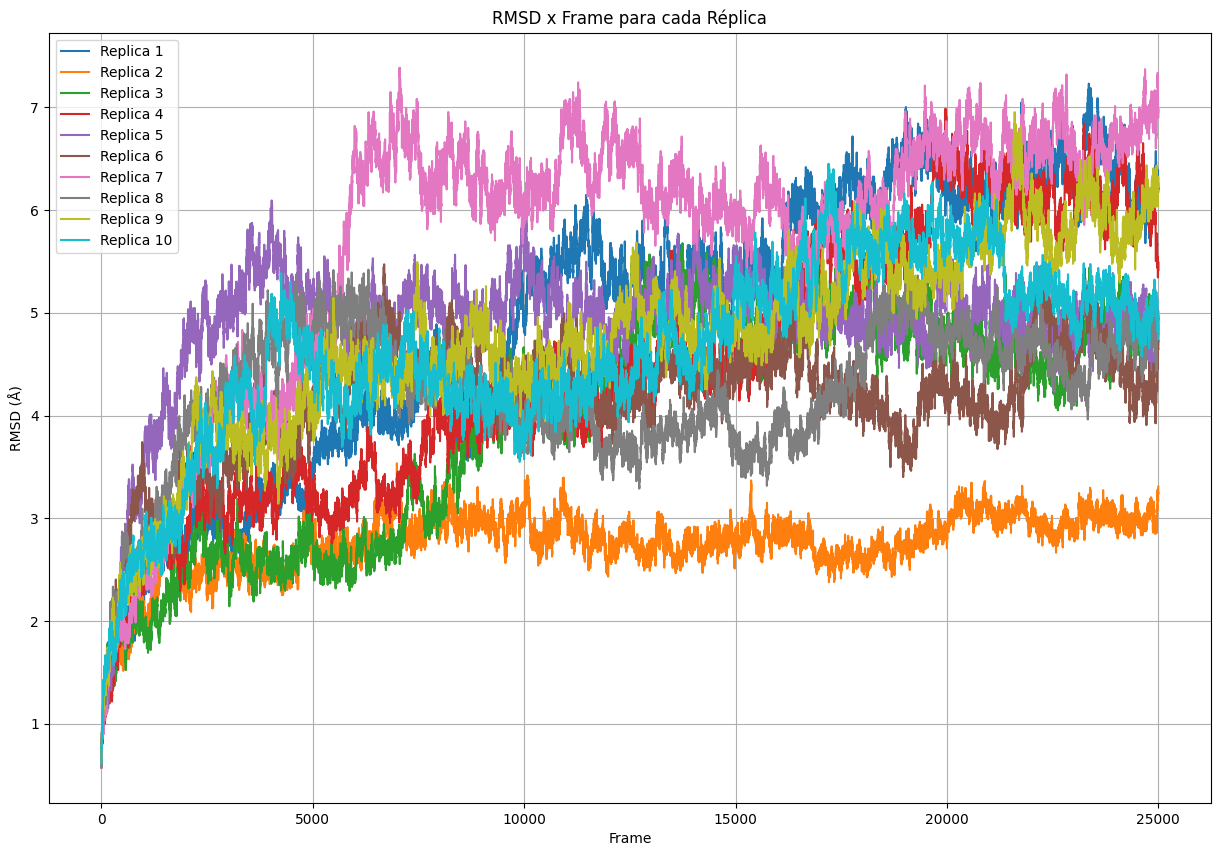

In [14]:
import matplotlib.pyplot as plt

# Configuração do plot
plt.figure(figsize=(15, 10))

# Plotar RMSD x Frame para cada réplica
for i in range(1, 11):
    # Filtra os dados para a réplica atual
    replica_data = combined_data[combined_data['Replicate'] == i]
    
    # Plot
    plt.plot(replica_data['Frame'], replica_data['RMSD'], label=f'Replica {i}')

# Adicionando detalhes ao gráfico
plt.title('RMSD x Frame para cada Réplica')
plt.xlabel('Frame')
plt.ylabel('RMSD (Å)')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()
